In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from operator import attrgetter

In [2]:
visits = pd.read_csv("/datasets/visits_log_us.csv")

visits.rename(columns={'Source Id':'source_id'}, inplace='True')
visits.rename(columns={'Device':'device'}, inplace='True')
visits.rename(columns={'End Ts':'end_ts'}, inplace='True')
visits.rename(columns={'Start Ts':'start_ts'}, inplace='True')
visits.rename(columns={'Uid':'uid'}, inplace='True')

In [3]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])

visits.head(10)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [4]:
orders = pd.read_csv("/datasets/orders_log_us.csv")

orders.rename(columns={'Buy Ts':'buy_ts'}, inplace='True')
orders.rename(columns={'Revenue':'revenue'}, inplace='True')
orders.rename(columns={'Uid':'uid'}, inplace='True')

In [5]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
orders.head(10)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [6]:
costs = pd.read_csv("/datasets/costs_us.csv")

costs.rename(columns={'source_id':'source_id'}, inplace='True')
costs.rename(columns={'dt':'dt'}, inplace='True')
costs.rename(columns={'costs':'costs'}, inplace='True')

In [7]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [8]:
funnel = pd.merge(orders, visits,  on='uid')
funnel.head(10)

,buy_ts,revenue,uid,device,end_ts,source_id,start_ts
0,2017-06-01 00:10:00,17.00,10329302124590727494,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00
5,2017-06-01 08:43:00,0.18,10402394430196413321,desktop,2017-06-01 08:46:00,3,2017-06-01 08:43:00
6,2017-06-01 08:54:00,1.83,12464626743129688638,desktop,2017-06-01 09:12:00,5,2017-06-01 08:51:00
7,2017-06-05 14:30:00,7.33,12464626743129688638,desktop,2017-06-01 09:12:00,5,2017-06-01 08:51:00
8,2017-06-01 09:22:00,1.22,3644482766749211722,desktop,2017-09-25 13:51:00,1,2017-09-25 13:43:00
9,2017-06-01 09:22:00,1.22,3644482766749211722,desktop,2018-01-05 17:52:00,2,2018-01-05 17:45:00


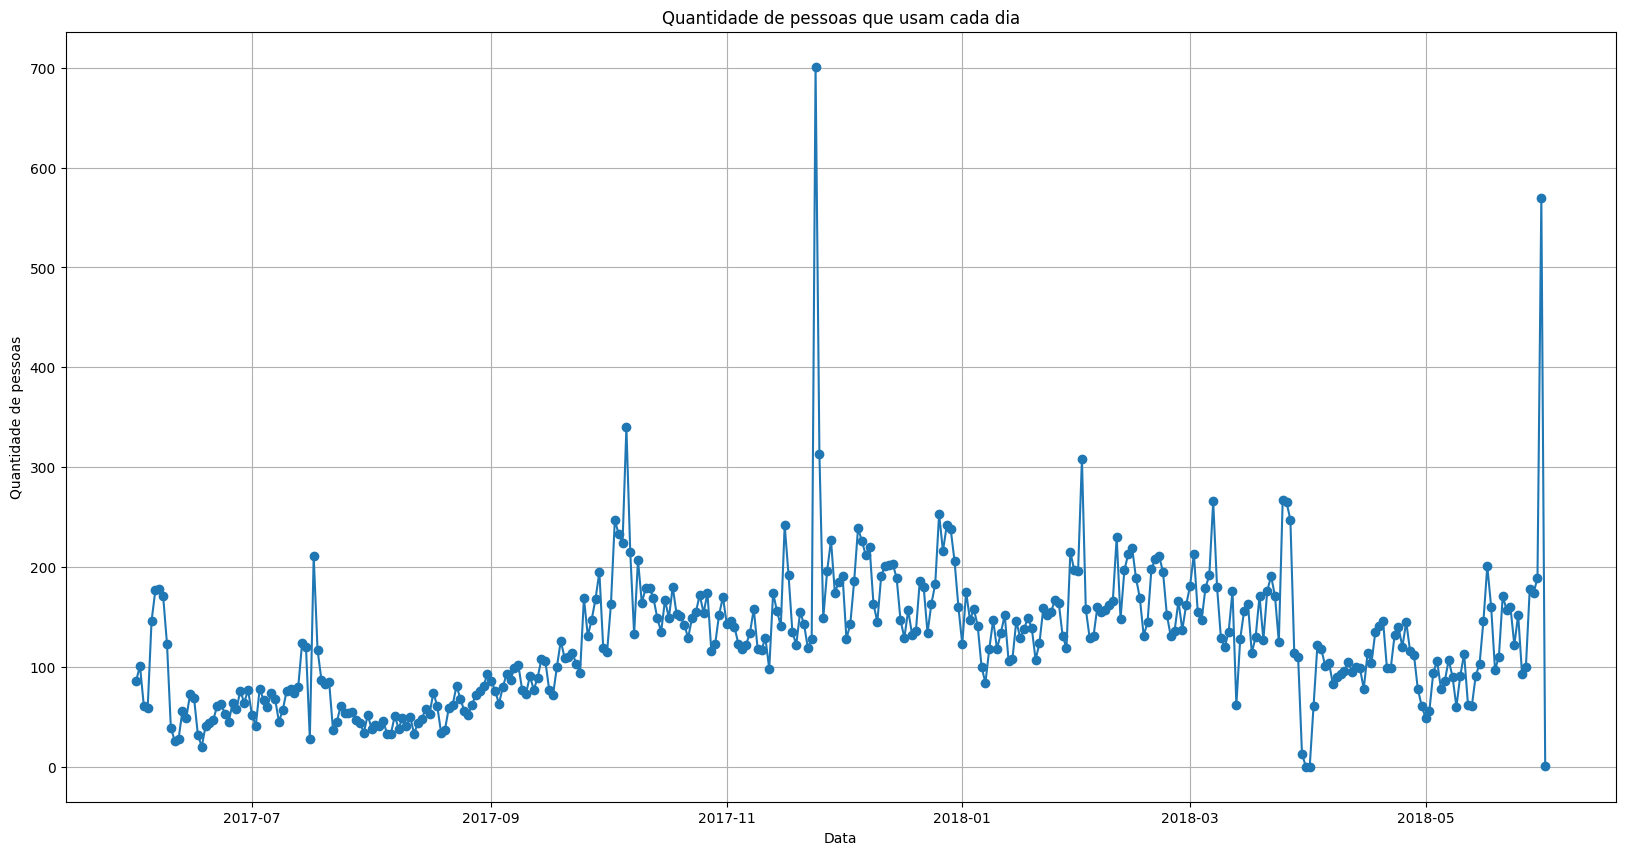

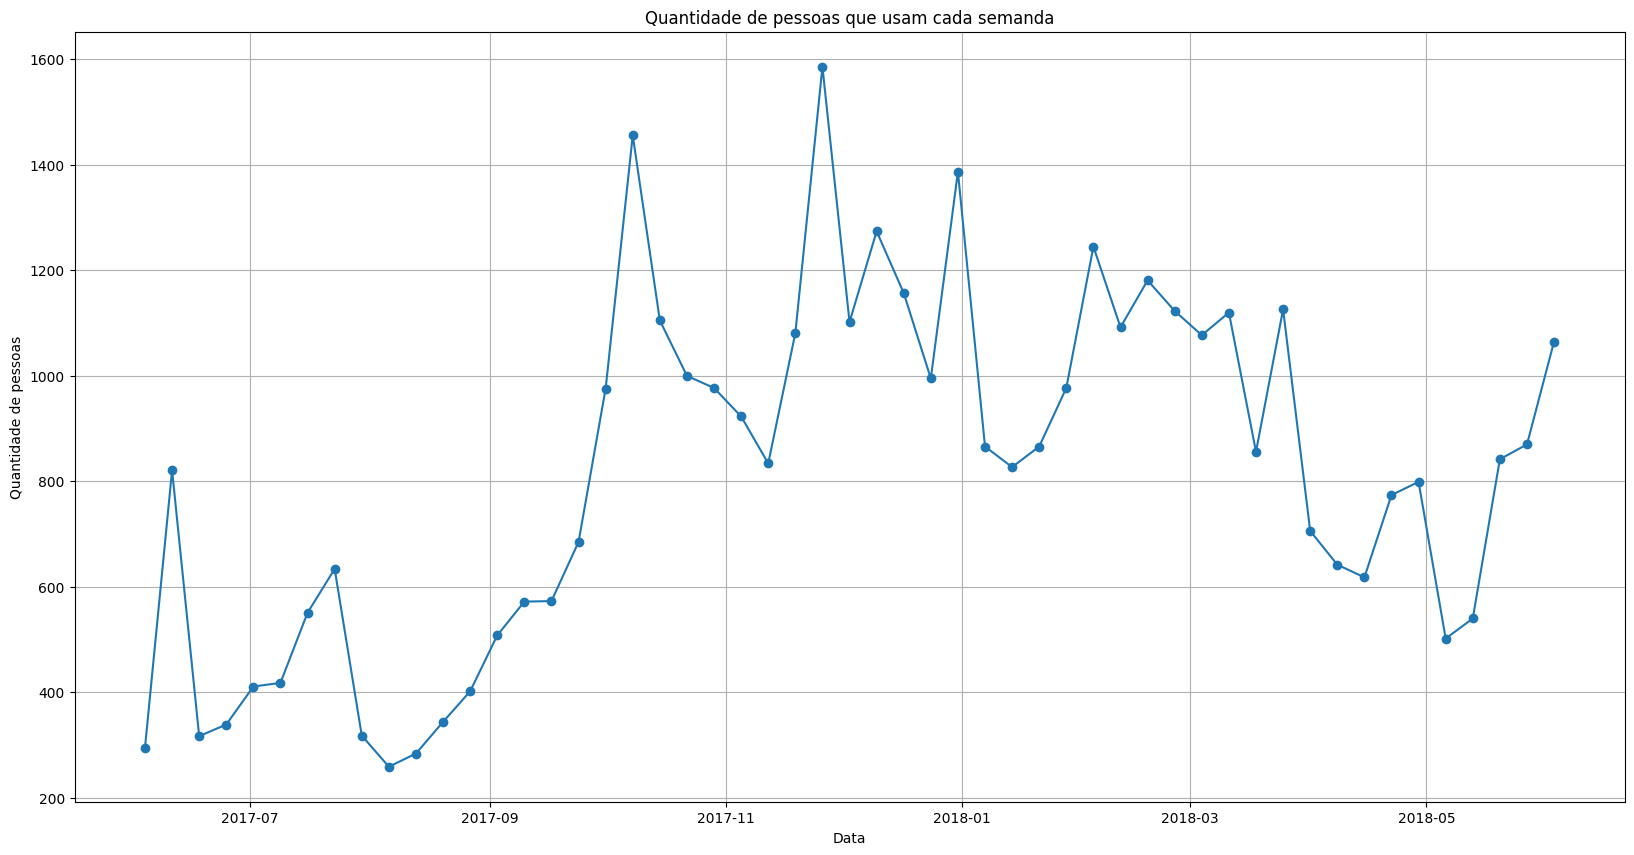

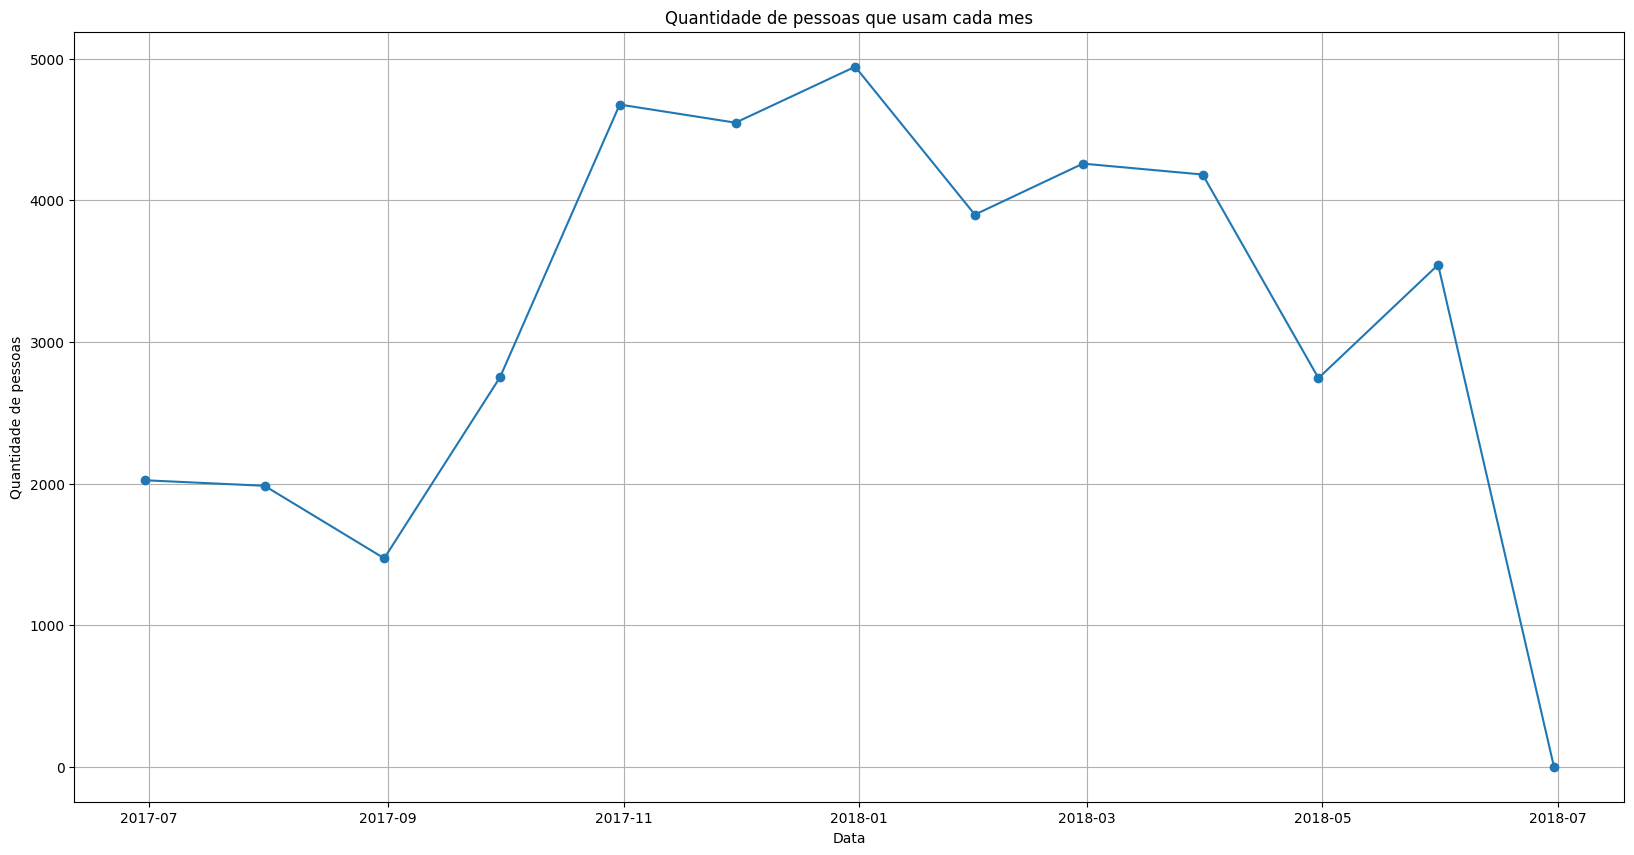

In [9]:
#Quantidade de pessoas que usam cada dia, semana e mês.

import matplotlib.pyplot as plt
import pandas as pd

quant = funnel.set_index('buy_ts')

# Contagem diária
daily_users = quant.resample('D').uid.nunique()

# Contagem semanal
weekly_users = quant.resample('W').uid.nunique()

# Contagem mensal
monthly_users = quant.resample('M').uid.nunique()


plt.figure(figsize=(20,10))
plt.plot(daily_users, marker='o')
plt.title('Quantidade de pessoas que usam cada dia')
plt.xlabel('Data')
plt.ylabel('Quantidade de pessoas')
plt.grid(True)
plt.show()

plt.figure(figsize=(20,10))
plt.plot(weekly_users, marker='o')
plt.title('Quantidade de pessoas que usam cada semanda')
plt.xlabel('Data')
plt.ylabel('Quantidade de pessoas')
plt.grid(True)
plt.show()

plt.figure(figsize=(20,10))
plt.plot(monthly_users, marker='o')
plt.title('Quantidade de pessoas que usam cada mes')
plt.xlabel('Data')
plt.ylabel('Quantidade de pessoas')
plt.grid(True)
plt.show()

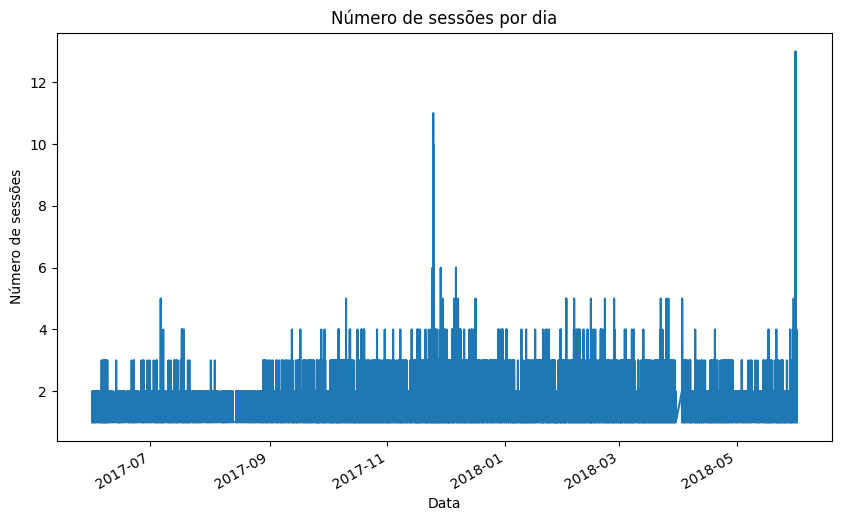

In [10]:
#Quantidade de sessões que ocorreram por dia
sessions_per_day = funnel.groupby('start_ts')['uid'].nunique()

plt.figure(figsize=(10,6))
sessions_per_day.plot(kind='line')
plt.title('Número de sessões por dia')
plt.xlabel('Data')
plt.ylabel('Número de sessões')
plt.show()

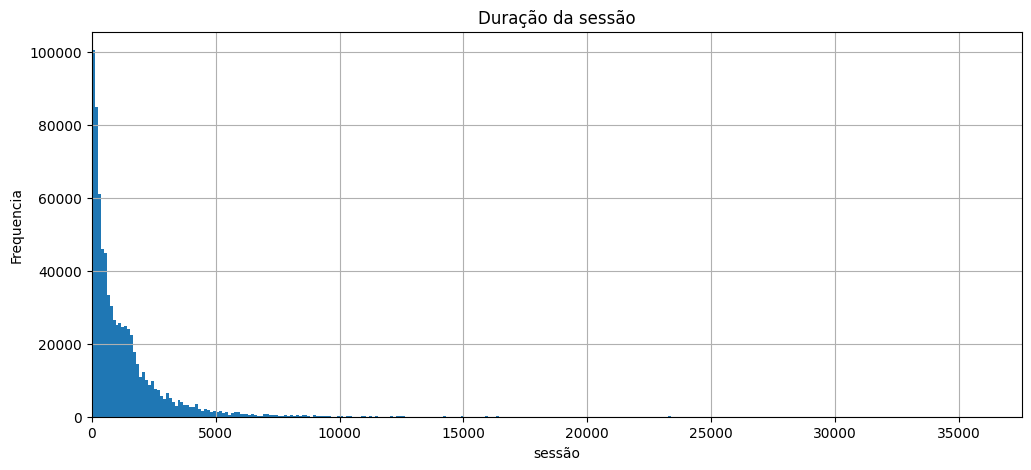

In [11]:
#comprimento de cada sessão
funnel['session_duration_sec'] = (funnel['end_ts'] - funnel['start_ts']).dt.seconds
funnel['session_duration_sec'].describe()

plt.figure(figsize= (12,5))
funnel['session_duration_sec'].hist(bins=300).set(title = 'Duração da sessão', xlabel = 'sessão', ylabel = 'Frequencia')
plt.xlim(0, )
plt.show()

<div class="alert alert-block alert-info">
<b>Análise de Coorte.</b> <a class="tocSkip"></a>
</div>

In [12]:
counts_orders = funnel.groupby('uid')['start_ts'].min()
counts_orders.name = 'first_order_date'

funnel = funnel.join(counts_orders, on='uid', rsuffix='_right')
funnel['first_order_month'] = funnel['first_order_date'].astype('datetime64[M]')
funnel['order_month'] = funnel['start_ts'].astype('datetime64[M]')
      #['uid']['start_ts']["source_id"]['revenue']['first_order_date']['first_order_month ']['order_month'])

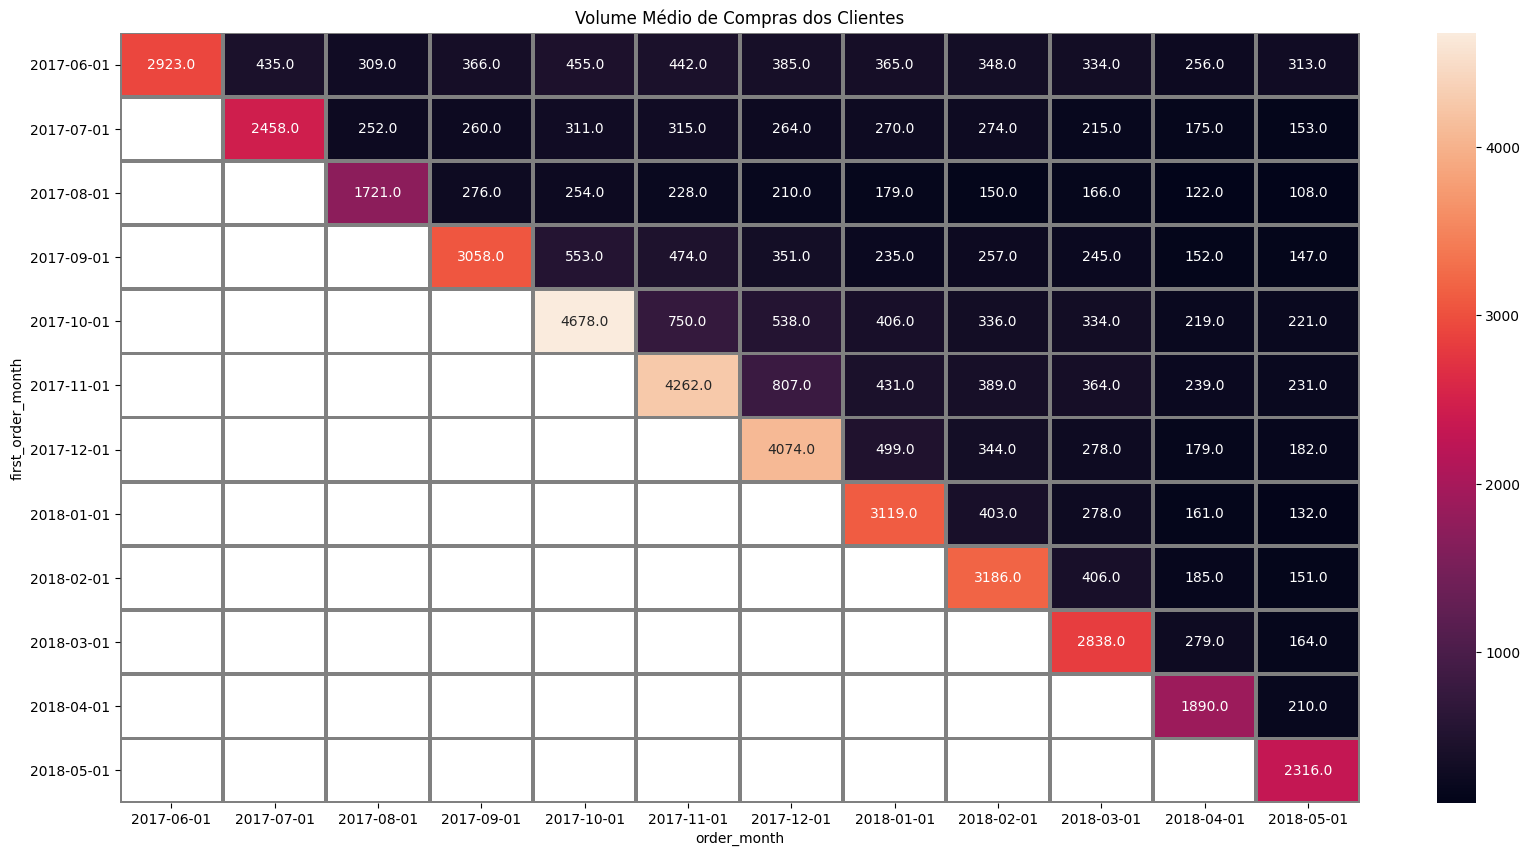

In [13]:
Coorte = funnel.pivot_table(
    index= funnel['first_order_month'].dt.strftime('%Y-%m-%d'),
    columns= funnel['order_month'].dt.strftime('%Y-%m-%d'),
    values='uid',
    aggfunc='nunique',
)

plt.figure(figsize=(20, 10));
plt.title('Volume Médio de Compras dos Clientes')
sns.heatmap(
    Coorte,
    annot=True,
    fmt='.1f',
    linewidths=2,
    linecolor='gray',
);

<div class="alert alert-block alert-info">
<b>Avaliando Mudanças em Valores Relativos pelo Tempo de Vida.</b> <a class="tocSkip"></a>
</div>

In [14]:
orders_grouped_by_cohorts = funnel.groupby(
    ['first_order_month', 'order_month']
).agg({'revenue': 'sum', 'uid': 'nunique'})
print(orders_grouped_by_cohorts.head())

                                 revenue   uid
first_order_month order_month                 
2017-06-01        2017-06-01   253324.55  2923
                  2017-07-01   190867.58   435
                  2017-08-01   184169.16   309
                  2017-09-01   340679.26   366
                  2017-10-01   410873.97   455


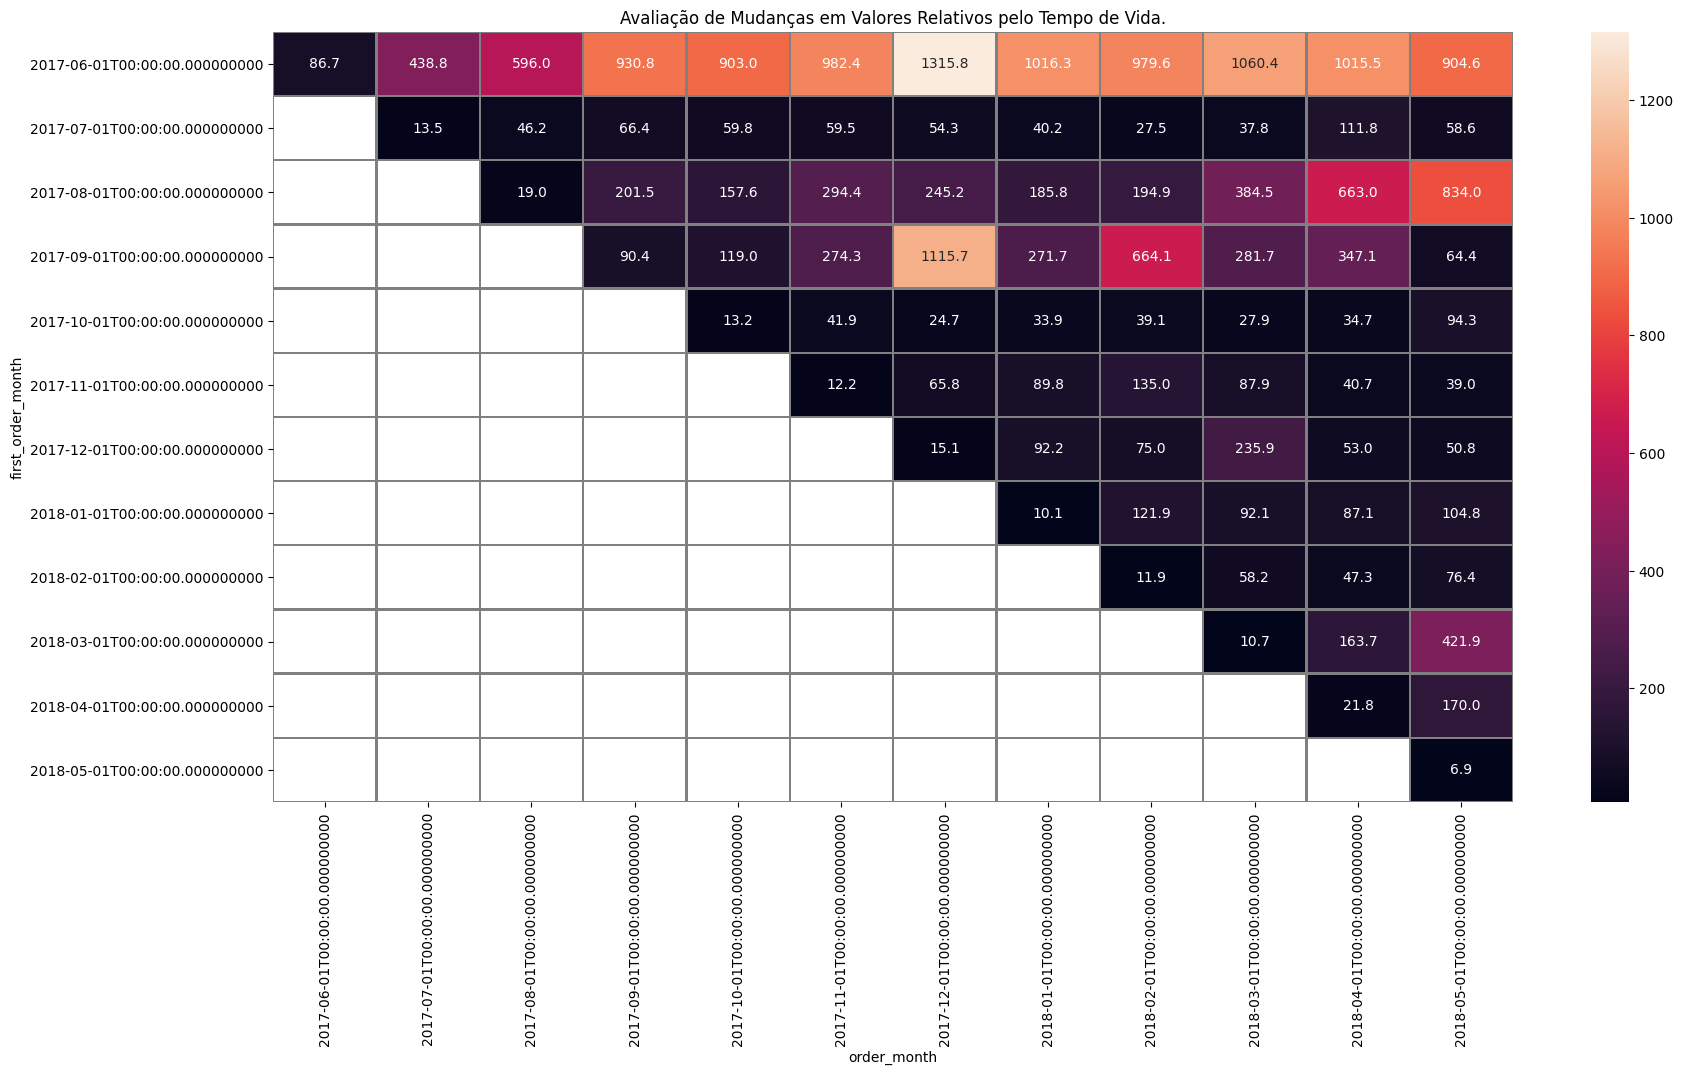

In [15]:
orders_grouped_by_cohorts['revenue_per_user'] = (
    orders_grouped_by_cohorts['revenue']
    / orders_grouped_by_cohorts['uid']
)

orders_cohorts = orders_grouped_by_cohorts.pivot_table(
    index='first_order_month',
    columns='order_month',
    values='revenue_per_user',
    aggfunc='mean',
)


plt.figure(figsize=(20, 10));
plt.title('Avaliação de Mudanças em Valores Relativos pelo Tempo de Vida.')
sns.heatmap(
    orders_cohorts,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
);


In [16]:
# logs_first_log_month

In [17]:
visits['log_month'] = visits['start_ts'].dt.to_period('M')

# Calcula o primeiro log do usuário
first_log_month = visits.groupby("uid").agg({"log_month": "min"}).reset_index().rename(
    columns={"log_month": "first_log_month"})

logs_first_log_month = pd.merge(visits, first_log_month, on='uid', how='left')

# Calcula o intervalo/cohort
logs_first_log_month["cohort"] = logs_first_log_month["log_month"].astype(
    int)- logs_first_log_month["first_log_month"].astype(int)

# Tabela de retenção
retention_table = logs_first_log_month.pivot_table(
    index='first_log_month',   # complete o código nesse trecho
    columns='cohort', # complete o código nesse trecho
    values='uid',  # complete o código nesse trecho
    aggfunc="nunique"
)
retention_table.fillna("")

cohort,0,1,2,3,4,5,6,7,8,9,10,11
first_log_month,,,,,,,,,,,,
2017-06,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2017-08,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
2017-09,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
2017-10,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,,,,
2017-11,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
2017-12,25268.0,1410.0,960.0,786.0,512.0,481.0,,,,,,
2018-01,22624.0,1351.0,890.0,565.0,458.0,,,,,,,
2018-02,22197.0,1267.0,565.0,446.0,,,,,,,,


In [18]:
# Tabela de taxa de retenção por cohort
retention_rates = retention_table.copy()
for col in retention_rates.columns[1:]:
    retention_rates[col] = retention_rates[col] / retention_rates[0]

retention_rates[0] = retention_rates[0]/retention_rates[0]

retention_rates.fillna('')

cohort,0,1,2,3,4,5,6,7,8,9,10,11
first_log_month,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,,
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.03586,0.024186,0.022809,,,
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,,,,
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.0218,,,,,
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,,,,,,
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,,,,,,,
2018-02,1.0,0.05708,0.025454,0.020093,,,,,,,,


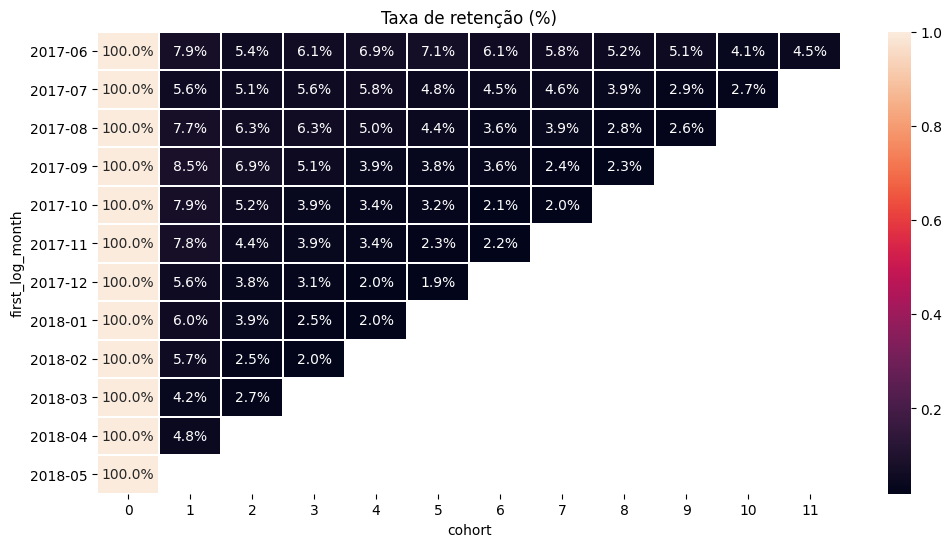

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(retention_rates, annot = True, fmt='.1%', linewidths=1)
plt.title('Taxa de retenção (%)')
plt.show()

In [20]:
# As pessoas que começaram a comprar

funnel['buy_ts'] = pd.to_datetime(funnel['buy_ts'])
funnel['start_ts'] = pd.to_datetime(funnel['start_ts'])
funnel['Conversion Days'] = (funnel['buy_ts'] - funnel['start_ts']).dt.days
conversion_counts = funnel['Conversion Days'].value_counts()

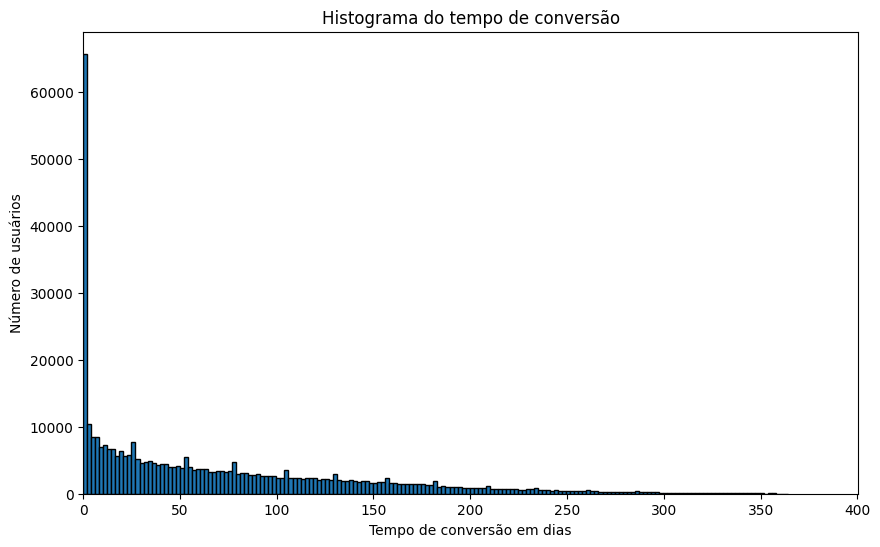

In [21]:
frequencia_tempos = funnel['Conversion Days'].value_counts().sort_index()

# Criando o histograma
plt.figure(figsize=(10, 6))  # Ajuste o tamanho conforme necessário
plt.hist(funnel['Conversion Days'], bins=350, edgecolor='black')
plt.title('Histograma do tempo de conversão')
plt.xlabel('Tempo de conversão em dias')
plt.ylabel('Número de usuários')
plt.xlim(0, )  
plt.ylim(0, )  

# Mostrando o histograma
plt.show()

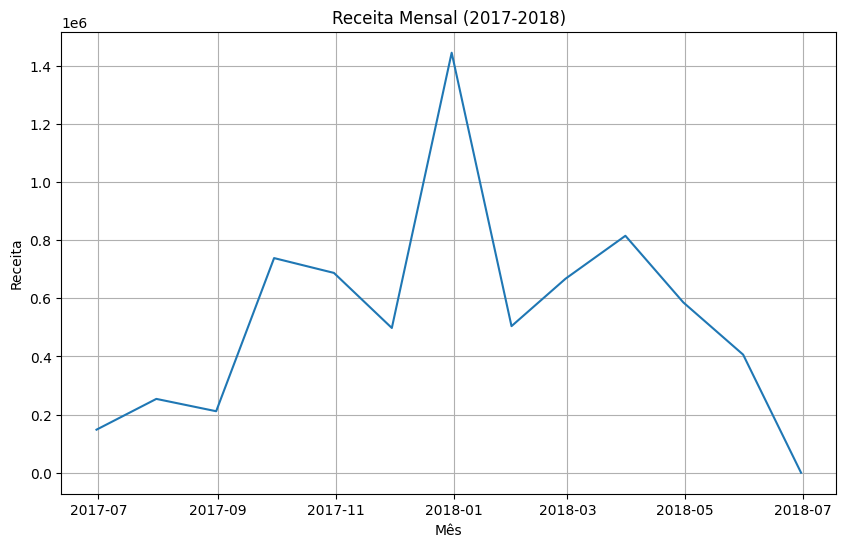

In [22]:
# Pedidos de clientes que fazeram compras durante um determinado período (janeiro de 2017 até dezembro de 2018)

import pandas as pd
import matplotlib.pyplot as plt

# Filtrar as compras feitas entre janeiro de 2017 e dezembro de 2018
mask = (funnel['buy_ts'] >= '2017-01-01') & (funnel['buy_ts'] <= '2018-12-31')
funnel = funnel.loc[mask]

# Agrupar por mês e somar a receita
funnel.set_index('buy_ts', inplace=True)
monthly_revenue = funnel.resample('M').sum()['revenue']

# Criar o gráfico
plt.figure(figsize=(10,6))
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.xlabel('Mês')
plt.ylabel('Receita')
plt.title('Receita Mensal (2017-2018)')
plt.grid(True)
plt.show()

In [23]:
#volume médio de compras

volume_medio_compra = funnel['revenue'].mean()
print(f'O volume médio de uma compra é: {volume_medio_compra}')

O volume médio de uma compra é: 9.139069803769196


<div class="alert alert-block alert-info">
<b>Calculando o LTV</b> <a class="tocSkip"></a>
</div>

In [24]:
orders

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [25]:
orders['order_month'] = orders['buy_ts'].dt.to_period('M')

In [26]:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head()


,uid,first_order_month
0,313578113262317,2018-01
1,1575281904278712,2017-06
2,2429014661409475,2017-10
3,2464366381792757,2018-01
4,2551852515556206,2017-11


In [27]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340


In [28]:
orders_ = pd.merge(orders,first_orders, on='uid')
orders_.head()

,buy_ts,revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,2017-06


In [29]:
cohorts = orders_.groupby(['first_order_month','order_month']).agg({'revenue': ['sum', 'count']}).reset_index()
cohorts.columns = ['_'.join(col) if col[1] != '' else col[0] for col in cohorts.columns]
cohorts.head()

,first_order_month,order_month,revenue_sum,revenue_count
0,2017-06,2017-06,9557.49,2354
1,2017-06,2017-07,981.82,177
2,2017-06,2017-08,885.34,174
3,2017-06,2017-09,1931.30,226
4,2017-06,2017-10,2068.58,292


In [30]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue_sum,revenue_count
0,2017-06,2023,2017-06,9557.49,2354
1,2017-06,2023,2017-07,981.82,177
2,2017-06,2023,2017-08,885.34,174
3,2017-06,2023,2017-09,1931.30,226
4,2017-06,2023,2017-10,2068.58,292


In [31]:
report['age'] = (report['order_month'] - report['first_order_month']).apply(attrgetter('n'))
report.head()

,first_order_month,n_buyers,order_month,revenue_sum,revenue_count,age
0,2017-06,2023,2017-06,9557.49,2354,0
1,2017-06,2023,2017-07,981.82,177,1
2,2017-06,2023,2017-08,885.34,174,2
3,2017-06,2023,2017-09,1931.30,226,3
4,2017-06,2023,2017-10,2068.58,292,4


In [32]:
report['revenue_per_user'] = report['revenue_sum'] / report['n_buyers']
report['orders_per_user'] = report['revenue_count'] / report['n_buyers']

report.head()

,first_order_month,n_buyers,order_month,revenue_sum,revenue_count,age,revenue_per_user,orders_per_user
0,2017-06,2023,2017-06,9557.49,2354,0,4.724414,1.163618
1,2017-06,2023,2017-07,981.82,177,1,0.485329,0.087494
2,2017-06,2023,2017-08,885.34,174,2,0.437637,0.086011
3,2017-06,2023,2017-09,1931.30,226,3,0.954671,0.111715
4,2017-06,2023,2017-10,2068.58,292,4,1.022531,0.144340


In [33]:
output = report.pivot_table(
    index='first_order_month', columns='age', values='revenue_per_user', aggfunc='sum'
)

output.cumsum(axis=1).round(2).fillna('')#.head(10)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02,4.16,4.44,4.51,4.59,,,,,,,,


In [34]:
# calculo do cac
buyers = orders.merge(visits.sort_values('start_ts').groupby('uid').first(), on='uid', how='inner')
buyers['first_order_dt'] = buyers['buy_ts'].dt.date

buyers_daily = buyers.groupby(['source_id', 'first_order_dt'])['uid'].count().reset_index(name='total_users')

buyers_daily['first_order_dt'] = pd.to_datetime(buyers_daily['first_order_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

costs_daily = pd.merge(buyers_daily, costs, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'dt'])
costs_daily['costs_per_user'] = costs_daily['costs'] / costs_daily['total_users'] # cac

costs_daily[costs_daily['first_order_dt']=='2017-06-01'].groupby(['source_id'])['costs_per_user'].mean()

source_id
1      4.423529
2     10.196923
3     10.587273
4      6.976364
5      4.308235
9      3.265000
10    15.080000
Name: costs_per_user, dtype: float64

In [35]:
costs_daily.groupby(['source_id'])['costs_per_user'].mean() # média cac por dia p/ cada canal

source_id
1      4.908409
2      8.456133
3     12.281569
4      5.941721
5      6.113527
9      4.786709
10     5.710732
Name: costs_per_user, dtype: float64

In [36]:
cohort_201706 = report[report['first_order_month'] == '2017-06']

costs_201706 = costs[costs['dt'] == '2017-06']['costs'].sum()

n_buyers_201706 = cohort_201706['n_buyers'][0]
cac_201706 = costs_201706 / n_buyers_201706
ltv_201706   = output.loc['2017-06'].sum()

print('CAC =', cac_201706)
print('LTV =', ltv_201706)


CAC = 0.3634503213049926
LTV = 11.879233811171527


O total de dinheiro gasto é: 329131.62


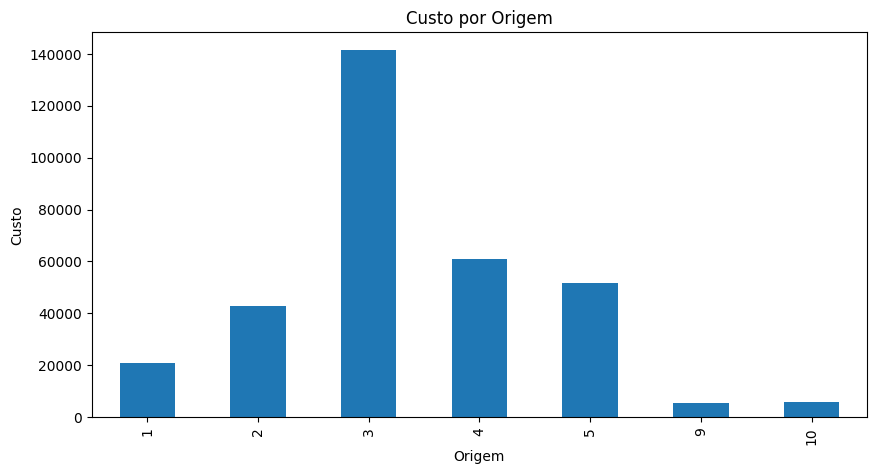

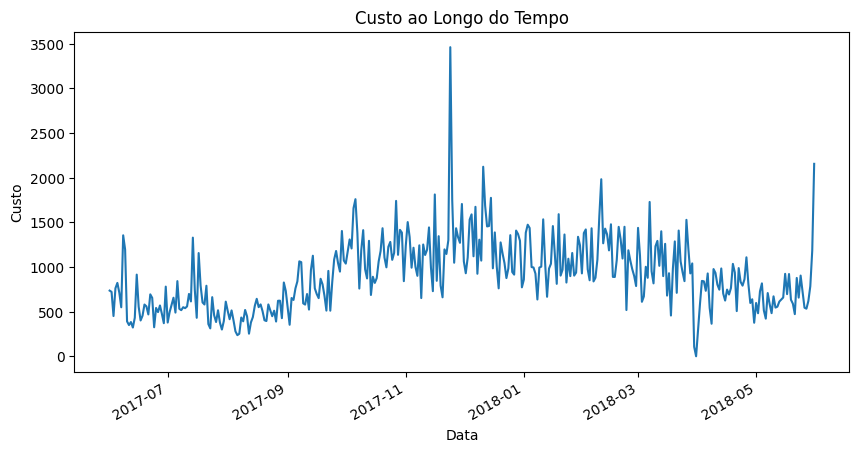

In [37]:
#total de dinheiro gasto (total/por origem/ao longo do tempo)
total_costs = costs['costs'].sum()
costs_by_source = costs.groupby('source_id')['costs'].sum()
costs_over_time = costs.groupby('dt')['costs'].sum()

print(f'O total de dinheiro gasto é: {total_costs:.2f}')

# Gráfico de custos por origem
plt.figure(figsize=(10, 5))
costs_by_source.plot(kind='bar')
plt.title('Custo por Origem')
plt.xlabel('Origem')
plt.ylabel('Custo')
plt.show()

# Gráfico de custos ao longo do tempo
plt.figure(figsize=(10, 5))
costs_over_time.plot()
plt.title('Custo ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Custo')
plt.show()

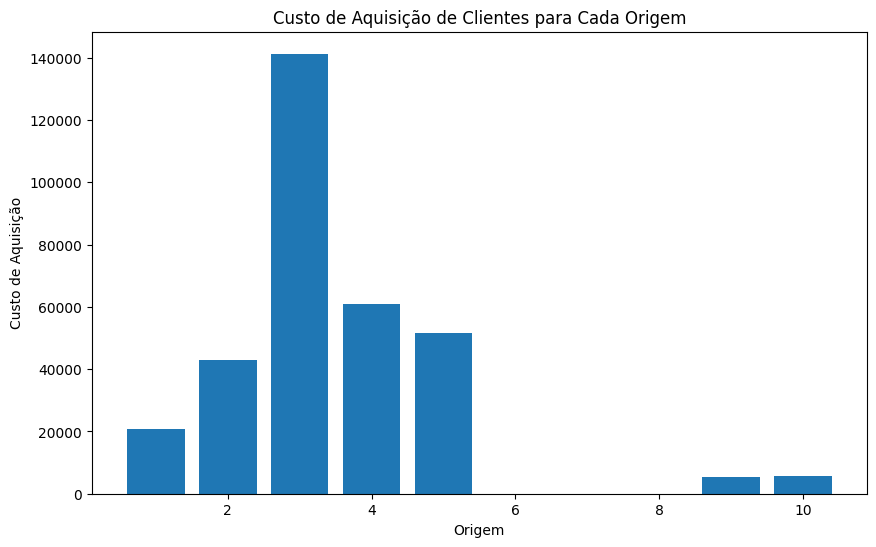

In [38]:
# Custo de aquisição de clientes para cada origem
# Seus dados
acquisition_costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()

# Criação do gráfico
plt.figure(figsize=(10,6))
plt.bar(acquisition_costs_by_source['source_id'], acquisition_costs_by_source['costs'])
plt.xlabel('Origem')
plt.ylabel('Custo de Aquisição')
plt.title('Custo de Aquisição de Clientes para Cada Origem')
plt.show()

<div class="alert alert-block alert-info">
<b>Retorno sobre Investimento (ROI) (receita - custos)</b> <a class="tocSkip"></a>
</div>

In [39]:
margin_rate = 0.0

report['gp'] = report['revenue_sum'] * margin_rate
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
)

output.fillna(' ')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
2017-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,
2017-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,
2017-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,
2017-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,
2017-12,0.0,0.0,0.0,0.0,0.0,0.0,,,,,,
2018-01,0.0,0.0,0.0,0.0,0.0,,,,,,,
2018-02,0.0,0.0,0.0,0.0,,,,,,,,


<div class="alert alert-block alert-info">
<b>OBS: O calculo do retorno sobre Investimento (ROI), foi realizado com base nas informações do conteudo da plataforma </b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-info">
<b>Acredito eu que esteja colocando mais de lucro onde não existe </b> <a class="tocSkip"></a>
</div>

In [40]:
#média dos valores em cada coluna
output.cumsum(axis=1).mean(axis=0)


age
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
dtype: float64

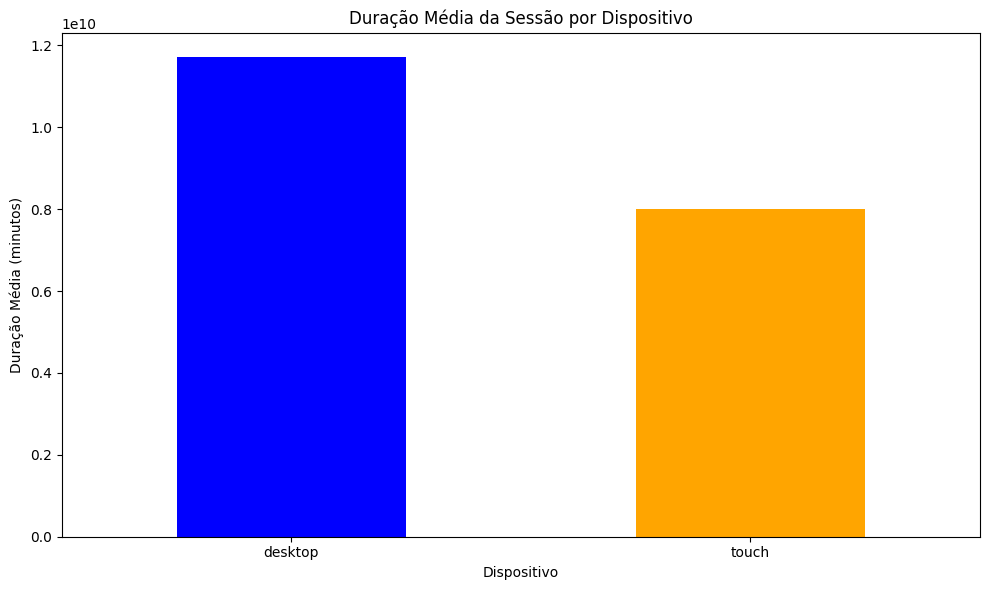

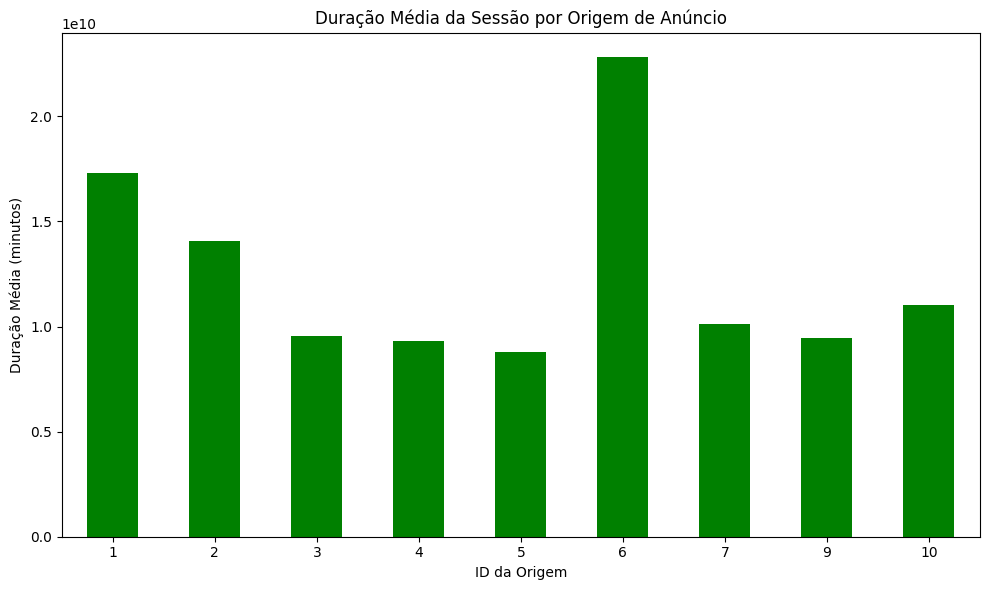

In [41]:
import matplotlib.pyplot as plt

visits['start_ts'] = pd.to_datetime(visits['start_ts']).astype(int)
visits['end_ts'] = pd.to_datetime(visits['end_ts']).astype(int)

# Calcule a duração em minutos
visits['duration'] = (visits['end_ts'] - visits['start_ts']) / 60

# Gráfico de barras para comparar a duração média da sessão por dispositivo
plt.figure(figsize=(10, 6))
visits.groupby('device')['duration'].mean().plot(kind='bar', color=['blue', 'orange'])
plt.title('Duração Média da Sessão por Dispositivo')
plt.xlabel('Dispositivo')
plt.ylabel('Duração Média (minutos)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Gráfico de barras para comparar a duração média da sessão por origem de anúncio
plt.figure(figsize=(10, 6))
visits.groupby('source_id')['duration'].mean().plot(kind='bar', color='green')
plt.title('Duração Média da Sessão por Origem de Anúncio')
plt.xlabel('ID da Origem')
plt.ylabel('Duração Média (minutos)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b> Conclusões </b> <a class="tocSkip"></a>
</div>

Recomendações de Plataformas: Eu recomendaria focar na plataforma ‘desktop’. O gráfico “Duração Média da Sessão por Dispositivo” mostra que as sessões em dispositivos ‘desktop’ têm durações significativamente mais longas do que aquelas em dispositivos ‘touch’. Isso sugere que os usuários de ‘desktop’ podem estar mais engajados, o que pode levar a uma maior conversão ou retenção de usuários.

Recomendações de Origens: Com base no gráfico “Custo de Aquisição de Clientes para Cada Origem”, eu recomendaria investigar mais a origem 4. Esta origem tem um custo de aquisição de clientes significativamente mais alto do que as outras origens. Compreender por que isso está acontecendo pode oferecer oportunidades para reduzir custos. Além disso, as origens com custos mais baixos podem ser áreas para aumentar o investimento, assumindo que elas estão gerando um bom retorno.

Métricas Focadas: As principais métricas em que me concentrei foram a duração média da sessão e o custo de aquisição de clientes. A duração média da sessão pode ser um indicador de engajamento do usuário, enquanto o custo de aquisição de clientes é um fator-chave na determinação do retorno sobre o investimento.

Conclusões: As métricas sugerem que a maioria dos usuários tende a ter sessões curtas, possivelmente realizando tarefas específicas ou consultando rapidamente informações. Isso pode ter implicações para a forma como o conteúdo é apresentado aos usuários, com um foco em tornar as informações mais importantes facilmente acessíveis. Além disso, o alto custo de aquisição de clientes para certas origens sugere que pode haver oportunidades para otimizar esses custos. Isso pode envolver uma análise mais aprofundada das estratégias de marketing e aquisição para essas origens. Finalmente, a presença de valores NaN em certas origens e coortes sugere que pode haver lacunas nos dados que precisam ser abordadas. Isso pode envolver a coleta de mais dados ou a investigação de por que essas informações estão ausentes.